# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime as datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [82]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [83]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
     
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
         # Note: date is pulled in unix, UTC
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | avtury
Processing Record 5 of Set 1 | zhangye
Processing Record 6 of Set 1 | arno
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | shagonar
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | nar'yan-mar
Processing Record 14 of Set 1 | torres
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | salalah
Processing Record 17 of Set 1 | arteche
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | brookings
Processing Record 20 of Set 1 | papao
Processing Record 21 of Set 1 | dover
Processing Record 22 of Set 1 | saint-philippe
Processing Record 23 of Set 1 | ilulissat

In [84]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          607
Lat           607
Lng           607
Max Temp      607
Humidity      607
Cloudiness    607
Wind Speed    607
Country       607
Date          607
dtype: int64

In [85]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,7.74,73,89,1.60,NZ,1685986296
1,west island,-12.1568,96.8225,25.99,78,75,8.23,CC,1685986296
2,port-aux-francais,-49.3500,70.2167,4.22,67,82,17.36,TF,1685986296
3,avtury,43.1600,46.0000,22.38,94,100,2.66,RU,1685986296
4,zhangye,38.9342,100.4517,19.57,41,100,5.70,CN,1685986296


In [86]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [87]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,7.74,73,89,1.60,NZ,1685986296
1,west island,-12.1568,96.8225,25.99,78,75,8.23,CC,1685986296
2,port-aux-francais,-49.3500,70.2167,4.22,67,82,17.36,TF,1685986296
3,avtury,43.1600,46.0000,22.38,94,100,2.66,RU,1685986296
4,zhangye,38.9342,100.4517,19.57,41,100,5.70,CN,1685986296


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

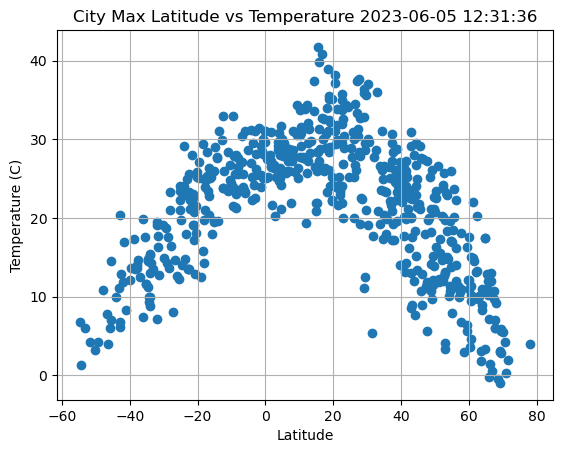

In [88]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
# I used the following source to convert the date:
# Cyberbemon, cyberbemoncyberbemon&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 2, Serge BallestaSerge Ballesta&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 143k1111 gold badges122122 silver badges249249 bronze badges, Julien SpronckJulien Spronck&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 14.9k44 gold badges4747 silver badges5555 bronze badges, &amp; textshelltextshell&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 1. (1962, February 1). Datetime.fromtimestamp vs datetime.utcfromtimestamp, which one is safer to use?. Stack Overflow. https://stackoverflow.com/questions/30921399/datetime-fromtimestamp-vs-datetime-utcfromtimestamp-which-one-is-safer-to-use 
city_date = datetime.datetime.fromtimestamp(city_data_df["Date"][0])
plt.title(f"City Max Latitude vs Temperature {city_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

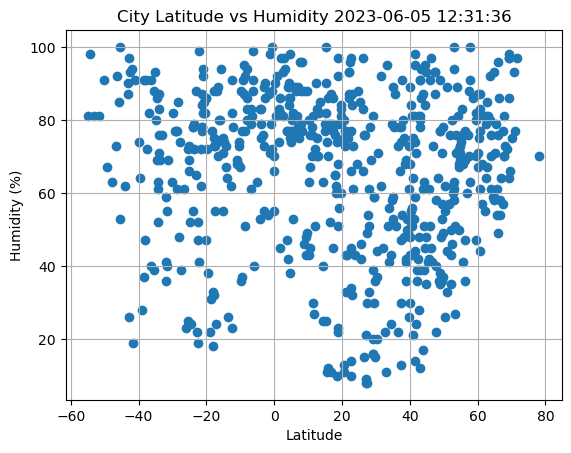

In [89]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# I used the following source to convert the date:
# Cyberbemon, cyberbemoncyberbemon&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 2, Serge BallestaSerge Ballesta&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 143k1111 gold badges122122 silver badges249249 bronze badges, Julien SpronckJulien Spronck&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 14.9k44 gold badges4747 silver badges5555 bronze badges, &amp; textshelltextshell&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 1. (1962, February 1). Datetime.fromtimestamp vs datetime.utcfromtimestamp, which one is safer to use?. Stack Overflow. https://stackoverflow.com/questions/30921399/datetime-fromtimestamp-vs-datetime-utcfromtimestamp-which-one-is-safer-to-use 
city_date = datetime.datetime.fromtimestamp(city_data_df["Date"][0])
plt.title(f"City Latitude vs Humidity {city_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

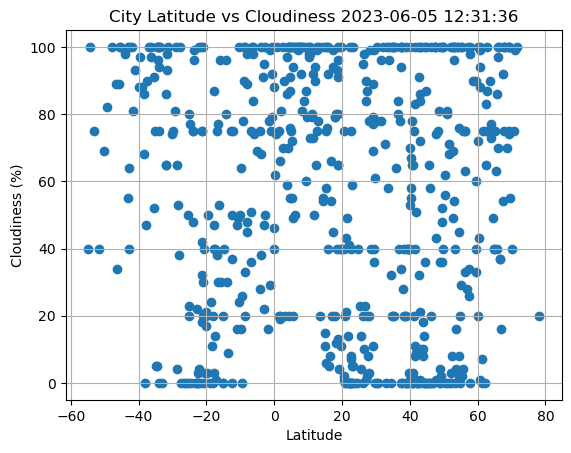

In [90]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# I used the following source to convert the date:
# Cyberbemon, cyberbemoncyberbemon&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 2, Serge BallestaSerge Ballesta&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 143k1111 gold badges122122 silver badges249249 bronze badges, Julien SpronckJulien Spronck&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 14.9k44 gold badges4747 silver badges5555 bronze badges, &amp; textshelltextshell&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 1. (1962, February 1). Datetime.fromtimestamp vs datetime.utcfromtimestamp, which one is safer to use?. Stack Overflow. https://stackoverflow.com/questions/30921399/datetime-fromtimestamp-vs-datetime-utcfromtimestamp-which-one-is-safer-to-use 
city_date = datetime.datetime.fromtimestamp(city_data_df["Date"][0])
plt.title(f"City Latitude vs Cloudiness {city_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

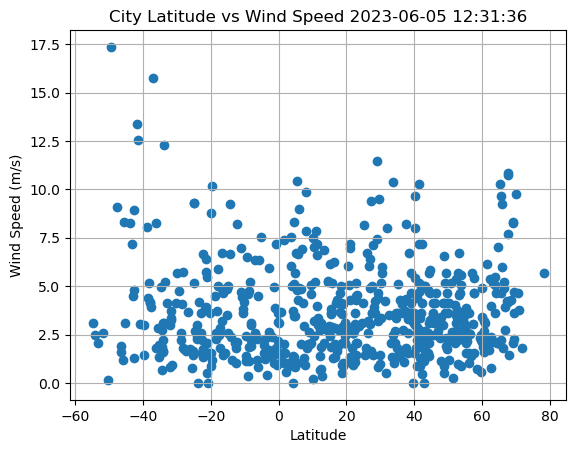

In [91]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# I used the following source to convert the date:
# Cyberbemon, cyberbemoncyberbemon&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 2, Serge BallestaSerge Ballesta&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 143k1111 gold badges122122 silver badges249249 bronze badges, Julien SpronckJulien Spronck&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 14.9k44 gold badges4747 silver badges5555 bronze badges, &amp; textshelltextshell&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 1. (1962, February 1). Datetime.fromtimestamp vs datetime.utcfromtimestamp, which one is safer to use?. Stack Overflow. https://stackoverflow.com/questions/30921399/datetime-fromtimestamp-vs-datetime-utcfromtimestamp-which-one-is-safer-to-use 
city_date = datetime.datetime.fromtimestamp(city_data_df["Date"][0])
plt.title(f"City Latitude vs Wind Speed {city_date}")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [92]:
# Define a function to create Linear Regression plots
def linearregression(x_values, y_values, x_label, y_label, x_pos, y_pos):
    # Run the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get the regression values
    regress_values = x_values * slope + intercept
    # Find the best fit line
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create the scatterplot
    scatter = plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    # Add x-label
    plt.xlabel(x_label)
    # Add y-label
    plt.ylabel(y_label)
    # Add line of best fit equation to the graph
    plt.annotate(line_eq,(x_pos,y_pos),fontsize=15,color="red")
    # Find r-squared value
    print(f"The r-value is: {rvalue**2}")

In [93]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,avtury,43.1600,46.0000,22.38,94,100,2.66,RU,1685986296
4,zhangye,38.9342,100.4517,19.57,41,100,5.70,CN,1685986296
5,arno,60.1167,18.6333,12.10,67,72,3.43,SE,1685986297
7,shagonar,51.5333,92.8000,17.26,57,68,0.25,RU,1685986297
10,bilibino,68.0546,166.4372,9.13,73,100,1.46,RU,1685986297


In [94]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,7.74,73,89,1.60,NZ,1685986296
1,west island,-12.1568,96.8225,25.99,78,75,8.23,CC,1685986296
2,port-aux-francais,-49.3500,70.2167,4.22,67,82,17.36,TF,1685986296
6,waitangi,-43.9535,-176.5597,9.90,62,98,8.24,NZ,1685986297
8,invercargill,-46.4000,168.3500,4.02,92,34,1.91,NZ,1685986297


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5672678898160418


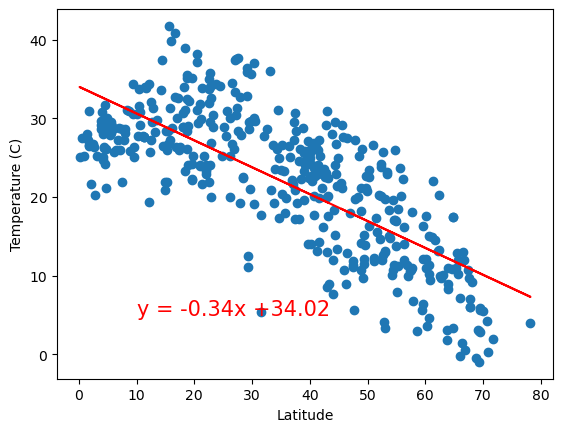

In [95]:
# Linear regression on Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Temperature (C)", 10, 5)

The r-value is: 0.7155399547702112


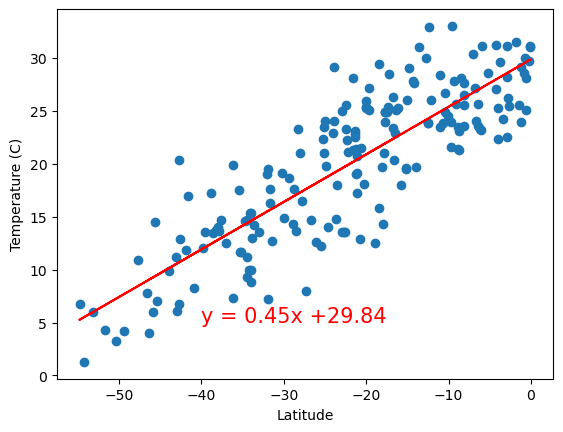

In [96]:
# Linear regression on Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Temperature (C)", -40, 5)

For the latitude and temperature, we can see that there is a strong linear correlation (positive in the southern hemisphere and negative in the northern hemisphere). The r-squared numbers close to one indicates that the linear correlation is strong.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0001214828430882473


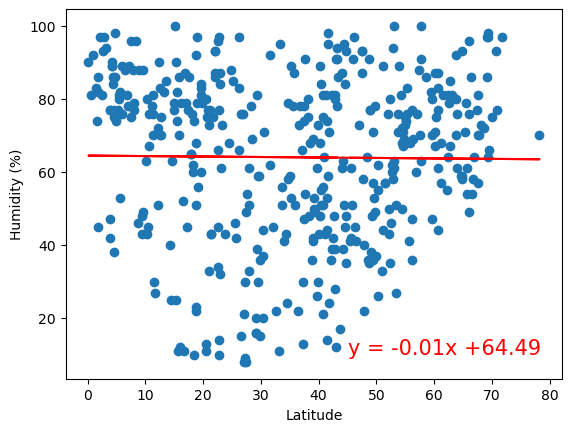

In [97]:
# Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)",  45, 10)

The r-value is: 0.0016476607130151734


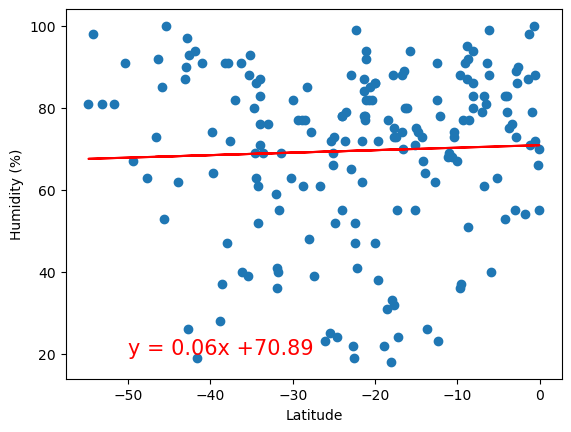

In [98]:
# Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", -50, 20)


The r-squared value for both the northern and southern hemisphere are low, indicating that there is likely no linear correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0070968751667614275


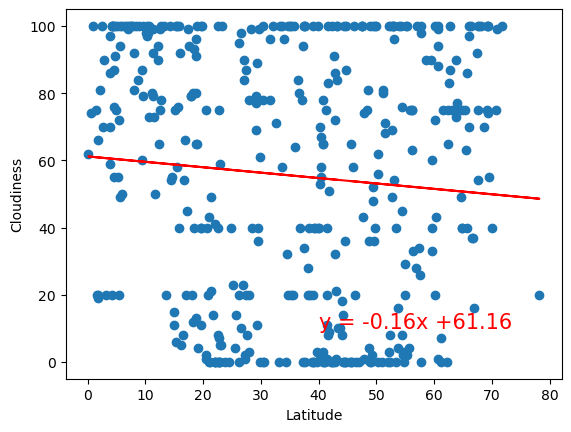

In [99]:
# Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness",  40, 10)

The r-value is: 0.024929803782704627


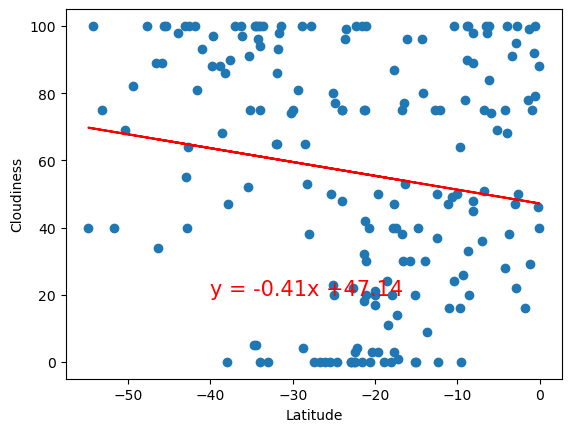

In [100]:
# Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness",  -40, 20)

There is a very low r-squared value between cloudiness and latitude, indicating that there is likely no linear correlation between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0024632576063447808


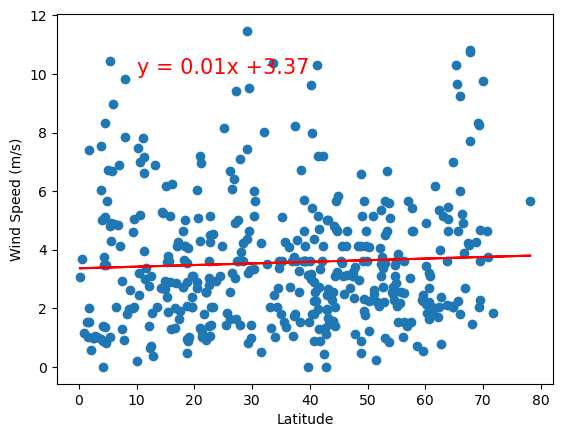

In [101]:
# Northern Hemisphere
linearregression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)",  10, 10)

The r-value is: 0.0464216261660174


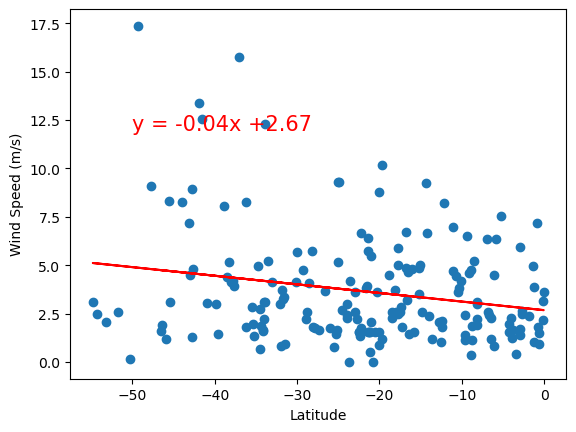

In [102]:
# Southern Hemisphere
linearregression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)",  -50, 12)

There are low r-squared values for both the northern and southern hemisphere for wind speed and latitude, indicating that there is no linear correlation between the two variables.